# 日收盘价数据预处理

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime
import numpy as np
%matplotlib notebook

In [58]:
stocks_daily_price = pd.read_excel('月度数据.xlsx')

stocks_daily_price.head()
# stocks_daily_price.columns

,日期,LZLJ,Media,NingDe,CNPA,LJLN
0,2019-04-30,74.6592,48.7311,79.4513,79.0566,15.9608
1,2019-05-31,67.7090,47.3490,69.1712,73.5799,16.7554
2,2019-06-28,77.4872,49.5064,68.6134,82.5306,16.3236
3,2019-07-31,77.3051,52.2175,75.8523,82.0462,18.1742
4,2019-08-30,94.5660,50.3846,72.1295,81.3291,19.5304


In [59]:
stocks_daily_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      38 non-null     datetime64[ns]
 1   LZLJ    38 non-null     float64       
 2   Media   38 non-null     float64       
 3   NingDe  38 non-null     float64       
 4   CNPA    38 non-null     float64       
 5   LJLN    38 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.9 KB


可知，并不需要进行缺失值处理。

In [60]:
stocks_daily_price.index=pd.DatetimeIndex(stocks_daily_price.日期) # 日期索引变换

stocks_daily_price.drop(labels=['日期'],axis=1,inplace=True)

stocks_daily_price.head()

,LZLJ,Media,NingDe,CNPA,LJLN
日期,,,,,
2019-04-30,74.6592,48.7311,79.4513,79.0566,15.9608
2019-05-31,67.7090,47.3490,69.1712,73.5799,16.7554
2019-06-28,77.4872,49.5064,68.6134,82.5306,16.3236
2019-07-31,77.3051,52.2175,75.8523,82.0462,18.1742
2019-08-30,94.5660,50.3846,72.1295,81.3291,19.5304


通过上一步的处理，我们将日期挪到了索引里，这方便我们后面的研究。（如画图）

# 股票数据可视化

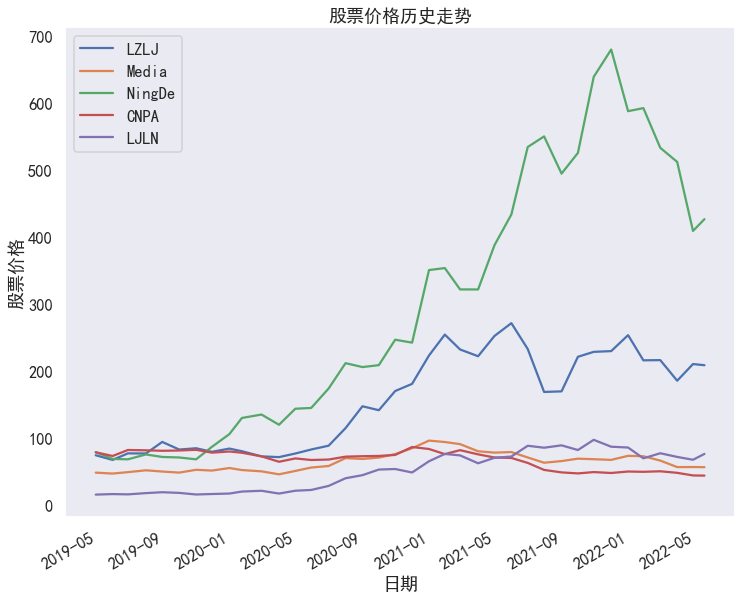

In [86]:
seaborn.set_style("darkgrid")
seaborn.set(font="SimHei")
seaborn.set_context("talk")
plt1 =stocks_daily_price.plot(figsize=(12,10),title="股票价格历史走势",grid=False)
plt1.set_xlabel('日期')
plt1.set_ylabel('股票价格')
plt1.figure.savefig('prices.png', dpi=600)

可以看到五家公司股票的走势的总体趋势类似，表明它们的股价都受到了同样的宏观因素的冲击，比如政府推行的减税政策对于全行业来说都是一个利好消息。但是股票肯定也会有一些公司层面的独特风险，比如公司的经营策略等，构建投资组合的目的就是为了降低公司层面的独特性风险。

# 日收益率计算、波动和分布

In [87]:
stocks_daily_return = np.log(stocks_daily_price)-np.log(stocks_daily_price.shift(1)) 
stocks_daily_return.dropna(inplace=True)
stocks_daily_return.head()

,LZLJ,Media,NingDe,CNPA,LJLN
日期,,,,,
2019-05-31,-0.097715,-0.028772,-0.138560,-0.071792,0.048585
2019-06-28,0.134894,0.044556,-0.008097,0.114797,-0.026109
2019-07-31,-0.002353,0.053316,0.100300,-0.005887,0.107391
2019-08-30,0.201538,-0.035732,-0.050325,-0.008779,0.071969
2019-09-30,-0.128237,-0.032347,-0.010712,0.005322,-0.052722


Text(0, 0.5, '日收益率波动范围')

C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


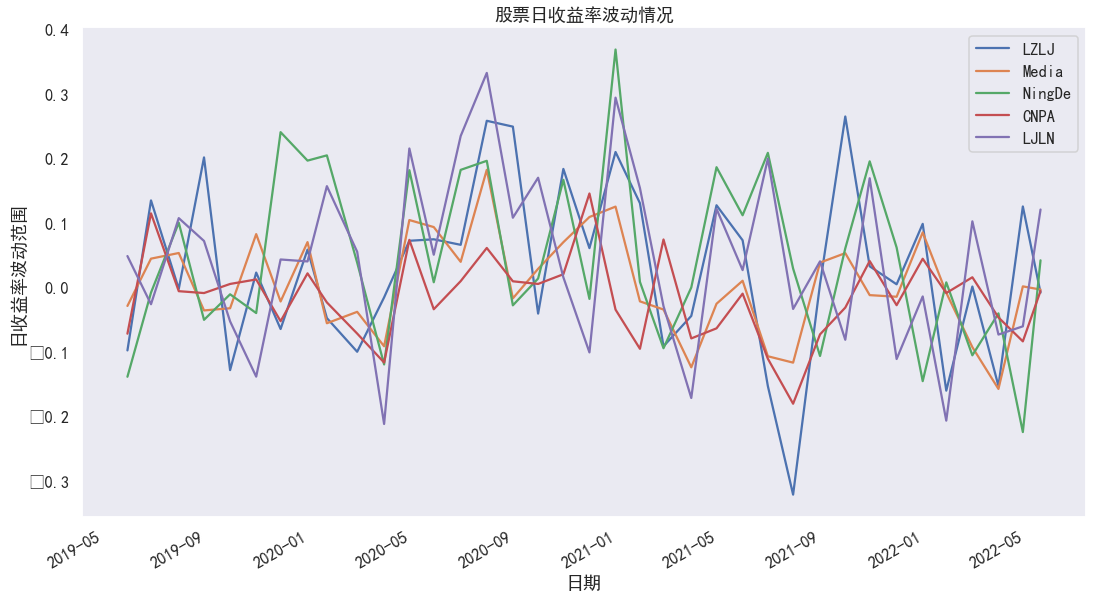

In [88]:
plt_volatility=stocks_daily_return.plot(figsize=(18,10),title="股票日收益率波动情况",grid=False)
plt_volatility.set_xlabel('日期')
plt_volatility.set_ylabel('日收益率波动范围')

可以看到，宁德时代、泸州老窖和隆基绿能的波动相对比较大。

Text(0, 0.5, '日收益率密度')

C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


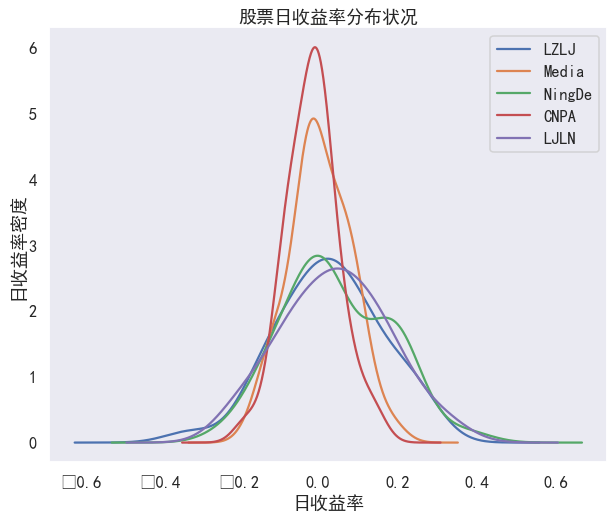

In [89]:
plt_dis=stocks_daily_return.plot(kind="density",figsize=(10,8),title="股票日收益率分布状况",grid=False)
plt_dis.set_xlabel('日收益率')
plt_dis.set_ylabel('日收益率密度')

可以看到，五只股票的日收益率波动都近似服从期望为0的正态分布，符合完全有效金融市场理论。

# 相关性分析

In [90]:
stocks_corr = stocks_daily_return.corr()
stocks_corr

,LZLJ,Media,NingDe,CNPA,LJLN
LZLJ,1.000000,0.625894,0.160626,0.395520,0.318035
Media,0.625894,1.000000,0.276358,0.586443,0.326755
NingDe,0.160626,0.276358,1.000000,0.073112,0.587863
CNPA,0.395520,0.586443,0.073112,1.000000,0.119036
LJLN,0.318035,0.326755,0.587863,0.119036,1.000000


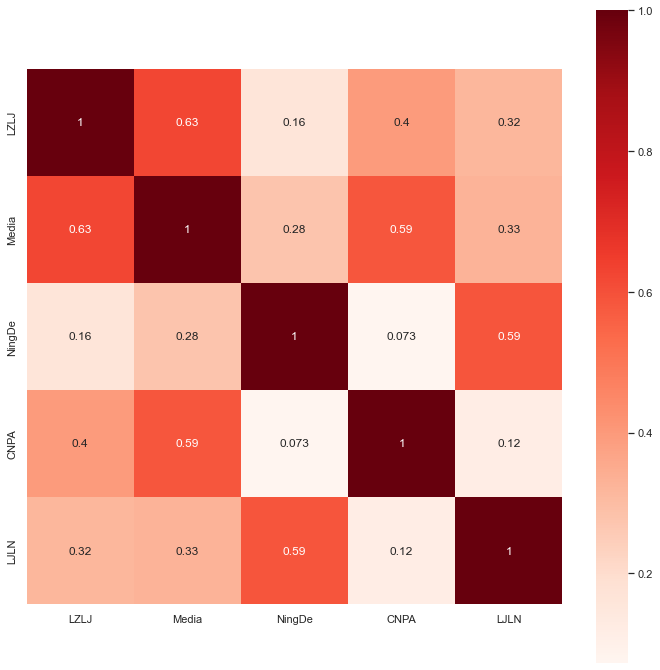

In [91]:
# hp = plot.subplots(figsize = (12,12))
# plt.figure(figsize = (12,12))


seaborn.set(rc = {'figure.figsize':(12,12)})
hm = seaborn.heatmap(stocks_corr,annot = True,vmax = 1,square = True,cmap = "Reds")
hm_fig = hm.get_figure()
hm_fig.savefig('corr_heat.png', dpi = 600)
# plt.show()
# plt.savefig('corr_heat.png', dpi=600)

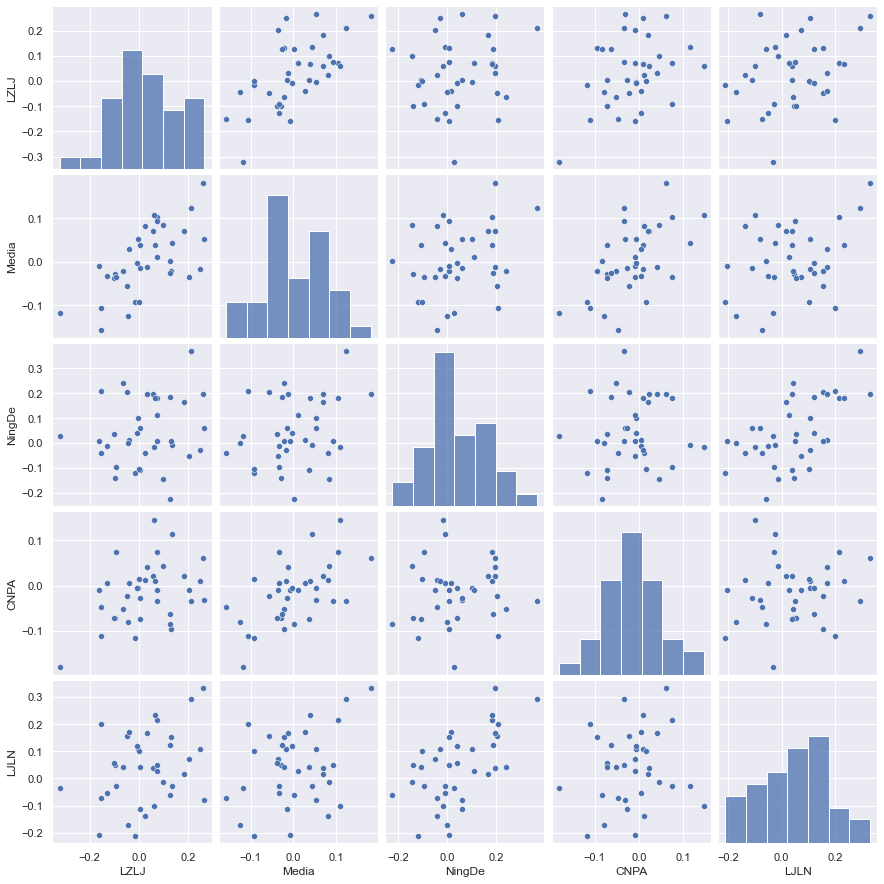

In [92]:
p = seaborn.pairplot(stocks_daily_return) 
p.savefig('cor_pair.png',dpi = 1200)

相关性在投资组合领域也非常重要，是分散化投资风险的核心思想。相关性越弱越有利于投资组合的分散化。
通过相关系数计算、热力图和分布图，可以看出五只股票的相关性都不是太强.
并且五只股票并没有负相关——相关系数都为正，一个原因可能是我们只选取了五只股票，而想要有效地分散投资风险，一般需要几十只股票。

# 有效前沿构造（解析法）

In [113]:
from scipy import linalg
# 定义类
class Markowitz:
    def __init__(self, returns):
        self.returns = returns
    # 求解最小方差组合
    def solveMinVar(self, goal_ret):
        cov = np.array(self.returns.cov())
        mean = np.array(self.returns.mean())
        row1 = np.append(np.append(cov.swapaxes(0,1),[mean],axis=0),
                        [np.ones(len(mean))], axis=0).swapaxes(0,1)
        row2 = list(np.ones(len(mean)))
        row2.extend([0,0])
        row3 = list(mean)
        row3.extend([0,0])
        A = np.append(row1, np.array([row2,row3]), axis=0)
        b = np.append(np.zeros(len(mean)), [1,goal_ret], axis=0)
        results = linalg.solve(A, b)
        return(np.array([list(self.returns.columns), results[:-2]]))
    # 计算投资组合方差
    def calVar(self, portion):
        return(np.dot(np.dot(portion, self.returns.cov()), portion))
    # 绘制有效前沿
    def plotFrontier(self):
        goal_ret = [x/100000 for x in range(-500, 1000)]
        variance = list(map(lambda x: self.calVar(self.solveMinVar(x)[1,:].astype(float)), goal_ret))
        
        plt.plot(variance, goal_ret)
        plt.xlabel('Variance')
        plt.ylabel('Expected Return')
        plt.title('Efficient Frontier')
        plt.show()
        plt.savefig('out1.png',dpi=600)

In [114]:
m = Markowitz(stocks_daily_return)

m.plotFrontier()

<IPython.core.display.Javascript object>